## CDC의 covid19에 대해 자신과 다른 사람들을 예방하기 위한 방법을 워드클라우드화

In [1]:
import pandas as pd
import lxml.html
import requests

In [22]:
res = requests.get('https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/prevention.html')
res

<Response [200]>

In [23]:
root = lxml.html.fromstring(res.text)
root

<Element html at 0x1ea473fd6d8>

In [26]:
content = root.cssselect('[role="main"]')[0].text_content()
content

'\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\r\n\r\n\t\t\t\t\r\n\t\t\t\t\tHow to Protect Yourself & OthersOther LanguagesEspaÃ±olç®\x80ä½\x93ä¸\xadæ\x96\x87Tiáº¿ng Viá»\x87tí\x95\x9cêµ\xadì\x96´Other Languages\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\tMinus\r\n\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\tRelated Pages\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\tOlder adults and people who have severe underlying medical conditions like heart or lung disease or diabetes seem to be at higher risk for developing serious complications from COVID-19 illness. More information on Are you at higher risk for serious illness?\n\r\n\t\r\n\r\nhead side cough iconKnow how it spreads\nThere is currently no vaccine to prevent coronavirus diseas

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [28]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[ 5,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  3,
         1,  2,  3,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  3,  6,  1,
         1,  1,  3,  2,  1,  1,  1,  2,  1,  2,  1,  6,  1,  1,  6,  1,
         1,  1,  1,  1,  1,  1,  2,  2,  2,  1,  1,  1,  2,  2,  1,  1,
         2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  6,  1,  1,  2,  2,  1,
         1,  1,  1,  2,  1,  8,  2,  2,  2,  1,  3,  1,  1,  2,  1,  4,
         1,  1,  2,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,
         2,  1,  3, 10,  3,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,
         2,  2,  1,  2,  1,  1,  1,  2,  1,  1,  2,  1,  3,  1,  2,  1,
         2,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  5,  2,  1,
         4,  1,  1,  2,  1,  1,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,
         2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5, 

In [29]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})
df

,word,freq
0,19,5
1,196,1
2,20,2
3,2019,1
4,2020,1
...,...,...
234,work,1
235,worker,1
236,young,1
237,ä½,1


In [30]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
147,people,10
85,hands,8
74,face,6
46,covid,6
43,cover,6
30,cloth,6
0,19,5
221,use,5
189,soap,5
231,water,5


In [31]:
from wordcloud import WordCloud

In [39]:
wc = WordCloud(width=800, height=800, background_color='white')

In [40]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

In [41]:
wc.fit_words(frequencies)

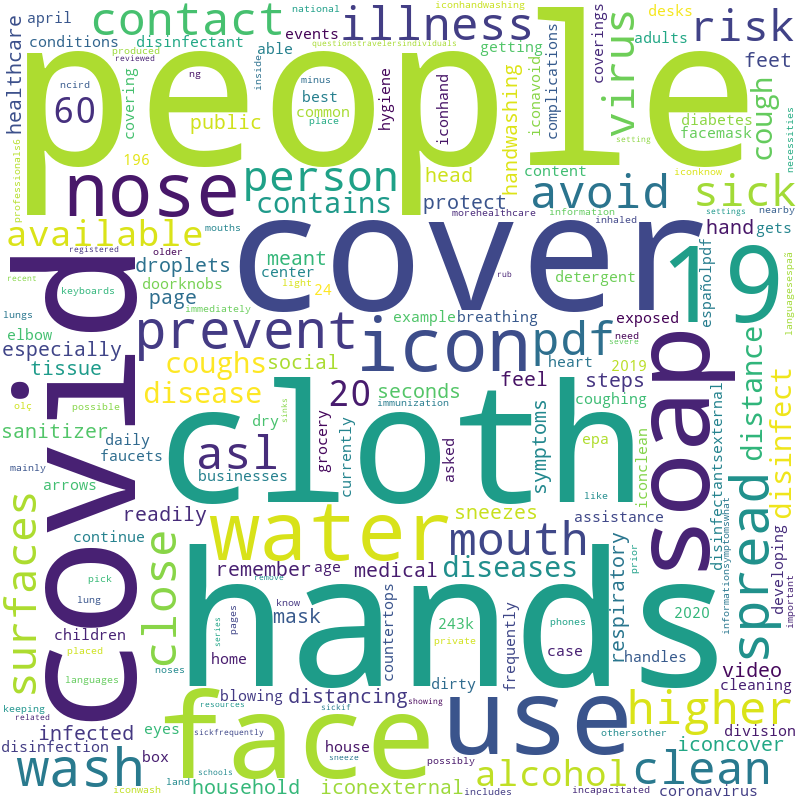

In [42]:
wc.to_image()

In [43]:
wc.to_file("covid_WC.png")

In [109]:
res1 = requests.get('https://www.k-health.com/news/articleView.html?idxno=46930')
res1

<Response [200]>

In [110]:
root1 = lxml.html.fromstring(res1.text)
root1

<Element html at 0x1ea4b095b88>

In [122]:
content1 = root1.cssselect('[class="user-snb-wrapper"]')[0].text_content()
content1

IndexError: list index out of range

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(stop_words='english')

In [114]:
tdm1 = cv1.fit_transform([content1]).toarray()
tdm1

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         6,  1,  1,  1,  1,  1,  7,  1,  1,  2,  1,  1,  2,  1,  1,  2,
         4,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  3,
         1,  1,  1,  1,  3,  1, 18,  1,  2,  1,  1,  1,  2,  2,  1,  1,
         1,  1,  1,  1,  3,  1,  2,  1,  4,  1,  2,  1,  3,  1,  1,  1,
         2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  9,  3,  1,  1,
         2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1, 12,  1,  1,  1,
         3,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  3,  1,  2,  3,  1,  1,  2,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  2,
         1,  2,  3,  1,  1,  2,  1,  1,  3,  1,  1,  1,  1,  1, 

In [115]:
df1 = pd.DataFrame({
    'word': cv1.get_feature_names(),
    'freq': tdm1.flat
})
df1

,word,freq
0,12번째,1
1,12월,1
2,1339에,1
3,15명,1
4,16명으로,1
...,...,...
537,환자에게서,1
538,환자의,1
539,회원,1
540,후베이성,1


In [116]:
df1.sort_values('freq', ascending=False).head(20)

,word,freq
70,reply,18
323,신종,14
485,코로나바이러스,13
140,국내,12
532,환자,10
108,감염증,9
245,발생,9
500,폐렴,8
366,우한,8
38,click,7


In [117]:
from wordcloud import WordCloud

In [118]:
#wc1 = WordCloud(width=800, height=800, background_color='white')
wc1 = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [119]:
frequencies1 = {word: freq for word, freq in zip(cv1.get_feature_names(), tdm.flat)}

In [120]:
wc1.fit_words(frequencies1)

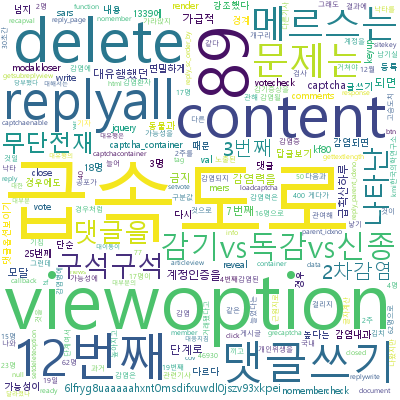

In [121]:
wc1.to_image()